# 🎯 Forex Contrarian Trading System con Filtro Performance

Sistema di trading quantitativo **CONTRARIAN** con **FILTRO di PERFORMANCE SETTIMANALE** per 22 coppie valutarie forex.

**Strategia Contrarian Filtrata:**
- Ribilanciamento settimanale ogni venerdì
- **Long sulle TOP 5 PERDENTI** (momentum negativo)
- **Short sulle TOP 5 VINCITRICI** (momentum positivo)
- **FILTRO PERFORMANCE**: Se il portafoglio perde nella settimana, la settimana successiva tutti i pesi = 0
- Equal weight allocation su 10 posizioni quando attivo

---

## 📦 Setup e Importazioni

In [1]:
# Importazioni
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Aggiungi percorso moduli
sys.path.append('core')

# Importa moduli core
from data_loader import load_forex_data, get_currency_pairs
from signal_generator import (
    generate_momentum_signals, 
    generate_contrarian_signals_with_filter,  # Nuova funzione con filtro
    validate_signals
)
from backtest_engine import BacktestEngine

# Configurazione matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("✅ Setup completato con successo!")
print("🎯 Modalità: Contrarian + Filtro Performance")

✅ Setup completato con successo!
🎯 Modalità: Contrarian + Filtro Performance


## 📊 Caricamento Dati e Configurazione

In [2]:
# Carica dati forex
print("🔄 Caricamento dati forex...")
data = load_forex_data('data/forex_synchronized_data.parquet')

# Configurazione strategia
lookback_days = 30  # Momentum lookback period
top_n = 5          # Top 5 long + Top 5 short

print(f"✅ Lookback selezionato: {lookback_days} giorni")
print(f"📈 Strategia: CONTRARIAN + FILTRO PERFORMANCE")
print(f"🎯 Filtro: Se settimana negativa → settimana successiva PESI = 0")

🔄 Caricamento dati forex...
✓ Loaded forex data: 4066 days, 88 columns
✓ Date range: 2010-01-01 to 2025-08-01
✅ Lookback selezionato: 30 giorni
📈 Strategia: CONTRARIAN + FILTRO PERFORMANCE
🎯 Filtro: Se settimana negativa → settimana successiva PESI = 0


## 🔄 Generazione Segnali con Filtro Performance

In [3]:
# Genera segnali contrarian senza filtro (baseline)
print(f"🔄 Generazione segnali contrarian SENZA filtro (baseline)...")
momentum_signals = generate_momentum_signals(
    price_data=data,
    lookback_days=lookback_days,
    top_n=top_n,
    rebalance_freq='weekly'
)
# Inverti per contrarian
contrarian_baseline = momentum_signals.copy() * -1

print(f"\n✅ Segnali baseline generati")
print(f"   • Long positions: {(contrarian_baseline == 0.2).sum().sum():,}")
print(f"   • Short positions: {(contrarian_baseline == -0.2).sum().sum():,}")

🔄 Generazione segnali contrarian SENZA filtro (baseline)...
✓ Generated momentum signals: 30d lookback, 5 long + 5 short
✓ Rebalancing: weekly
✓ Signal range: 2010-01-01 to 2025-08-01

✅ Segnali baseline generati
   • Long positions: 20,330
   • Short positions: 20,330


In [4]:
# Genera segnali contrarian CON filtro di performance
print(f"\n🎯 Generazione segnali contrarian CON FILTRO PERFORMANCE...")
contrarian_filtered = generate_contrarian_signals_with_filter(
    price_data=data,
    lookback_days=lookback_days,
    top_n=top_n,
    rebalance_freq='weekly'
)

print(f"\n📊 Confronto Segnali (Baseline vs Filtrato):")
print(f"   • Baseline Long: {(contrarian_baseline == 0.2).sum().sum():,}")
print(f"   • Baseline Short: {(contrarian_baseline == -0.2).sum().sum():,}")
print(f"   • Filtrato Long: {(contrarian_filtered == 0.2).sum().sum():,}")
print(f"   • Filtrato Short: {(contrarian_filtered == -0.2).sum().sum():,}")

# Calcola riduzione segnali
baseline_signals = (contrarian_baseline != 0).sum().sum()
filtered_signals = (contrarian_filtered != 0).sum().sum()
signal_reduction = ((baseline_signals - filtered_signals) / baseline_signals) * 100

print(f"\n🔍 Effetto del Filtro:")
print(f"   • Segnali totali baseline: {baseline_signals:,}")
print(f"   • Segnali totali filtrati: {filtered_signals:,}")
print(f"   • Riduzione segnali: {signal_reduction:.1f}%")


🎯 Generazione segnali contrarian CON FILTRO PERFORMANCE...
🔄 Generating base contrarian signals (30d lookback)...
✓ Base contrarian signals generated
🔍 Applying weekly performance filter...
✓ Performance filter applied
📊 Filter activations: 388 weeks out of 813 total weeks
📈 Filter rate: 47.7% of weeks filtered

📊 Confronto Segnali (Baseline vs Filtrato):
   • Baseline Long: 20,330
   • Baseline Short: 20,330
   • Filtrato Long: 10,630
   • Filtrato Short: 10,630

🔍 Effetto del Filtro:
   • Segnali totali baseline: 40,660
   • Segnali totali filtrati: 21,260
   • Riduzione segnali: 47.7%


## 🚀 Backtesting Comparativo

In [5]:
# Backtest strategia CONTRARIAN BASELINE (senza filtro)
print("⚡ Backtest strategia CONTRARIAN BASELINE (senza filtro)...")
engine_baseline = BacktestEngine(initial_capital=100000, leverage=1.0)
start_time = datetime.now()
results_baseline = engine_baseline.run_backtest(data, contrarian_baseline, verbose=False)
time_baseline = (datetime.now() - start_time).total_seconds()

# Backtest strategia CONTRARIAN FILTRATA
print("⚡ Backtest strategia CONTRARIAN FILTRATA (con filtro performance)...")
engine_filtered = BacktestEngine(initial_capital=100000, leverage=1.0)
start_time = datetime.now()
results_filtered = engine_filtered.run_backtest(data, contrarian_filtered, verbose=False)
time_filtered = (datetime.now() - start_time).total_seconds()

print(f"\n✅ Backtesting completato!")
print(f"   • Strategia Baseline: {time_baseline:.2f}s")
print(f"   • Strategia Filtrata: {time_filtered:.2f}s")

INFO:backtest_engine:BacktestEngine initialized with 100,000 starting capital
INFO:backtest_engine:Detected 22 currency pairs
INFO:backtest_engine:Price data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Signals data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Calculating daily returns...


⚡ Backtest strategia CONTRARIAN BASELINE (senza filtro)...


INFO:backtest_engine:Calculated returns for 22 pairs
INFO:backtest_engine:Calculating performance metrics...
INFO:backtest_engine:BacktestEngine initialized with 100,000 starting capital
INFO:backtest_engine:Detected 22 currency pairs
INFO:backtest_engine:Price data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Signals data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Calculating daily returns...
INFO:backtest_engine:Calculated returns for 22 pairs
INFO:backtest_engine:Calculating performance metrics...


⚡ Backtest strategia CONTRARIAN FILTRATA (con filtro performance)...

✅ Backtesting completato!
   • Strategia Baseline: 3.34s
   • Strategia Filtrata: 0.04s


## 📊 Confronto Performance Dettagliato

In [6]:
# Estrai metriche per confronto
metrics_baseline = engine_baseline.performance_metrics
metrics_filtered = engine_filtered.performance_metrics

print("="*85)
print(f"📊 CONFRONTO PERFORMANCE - CONTRARIAN CON FILTRO ({lookback_days} GIORNI)")
print("="*85)

print(f"\n{'METRICA':<25} {'BASELINE':<15} {'FILTRATO':<15} {'MIGLIORAMENTO':<20}")
print("-"*80)

# Confronto metriche chiave
metrics_to_compare = [
    ('Total Return (%)', 'Total Return (%)'),
    ('Annualized Return (%)', 'Annualized Return (%)'),
    ('Annualized Volatility (%)', 'Volatilità (%)'),
    ('Sharpe Ratio', 'Sharpe Ratio'),
    ('Maximum Drawdown (%)', 'Max Drawdown (%)'),
    ('Win Rate (%)', 'Win Rate (%)'),
    ('Sortino Ratio', 'Sortino Ratio'),
    ('Calmar Ratio', 'Calmar Ratio')
]

improvements = {}
for metric_key, display_name in metrics_to_compare:
    baseline_val = metrics_baseline[metric_key]
    filtered_val = metrics_filtered[metric_key]
    
    # Calcola miglioramento
    if 'Drawdown' in metric_key:
        improvement = baseline_val - filtered_val  # Per drawdown, riduzione è meglio
        improvement_str = f"{improvement:+.2f}pp"
    else:
        if baseline_val != 0:
            improvement = ((filtered_val / baseline_val) - 1) * 100
            improvement_str = f"{improvement:+.1f}%"
        else:
            improvement_str = "N/A"
    
    improvements[display_name] = improvement_str
    print(f"{display_name:<25} {baseline_val:<15.2f} {filtered_val:<15.2f} {improvement_str:<20}")

print("\n" + "="*85)

# Valori finali portfolio
final_baseline = engine_baseline.portfolio_value.iloc[-1]
final_filtered = engine_filtered.portfolio_value.iloc[-1]

print(f"\n💰 RISULTATI FINALI:")
print(f"   • Portfolio Baseline: ${final_baseline:,.0f}")
print(f"   • Portfolio Filtrato: ${final_filtered:,.0f}")
print(f"   • Differenza: ${final_filtered - final_baseline:+,.0f}")

if final_filtered > final_baseline:
    print(f"\n🎯 Il FILTRO DI PERFORMANCE ha MIGLIORATO la strategia!")
    improvement = ((final_filtered / final_baseline) - 1) * 100
    print(f"   • Miglioramento: +{improvement:.1f}%")
else:
    print(f"\n📉 Il filtro ha ridotto la performance.")
    reduction = ((final_baseline / final_filtered) - 1) * 100
    print(f"   • Riduzione: -{reduction:.1f}%")

📊 CONFRONTO PERFORMANCE - CONTRARIAN CON FILTRO (30 GIORNI)

METRICA                   BASELINE        FILTRATO        MIGLIORAMENTO       
--------------------------------------------------------------------------------
Total Return (%)          47.78           45.85           -4.0%               
Annualized Return (%)     2.45            2.37            -3.4%               
Volatilità (%)            12.36           8.26            -33.1%              
Sharpe Ratio              0.04            0.04            +21.9%              
Max Drawdown (%)          39.02           18.53           +20.49pp            
Win Rate (%)              50.43           26.40           -47.7%              
Sortino Ratio             0.05            0.05            -6.4%               
Calmar Ratio              0.06            0.13            +103.4%             


💰 RISULTATI FINALI:
   • Portfolio Baseline: $147,785
   • Portfolio Filtrato: $145,852
   • Differenza: $-1,933

📉 Il filtro ha ridotto la perfo

## 📈 Visualizzazioni Comparative Complete

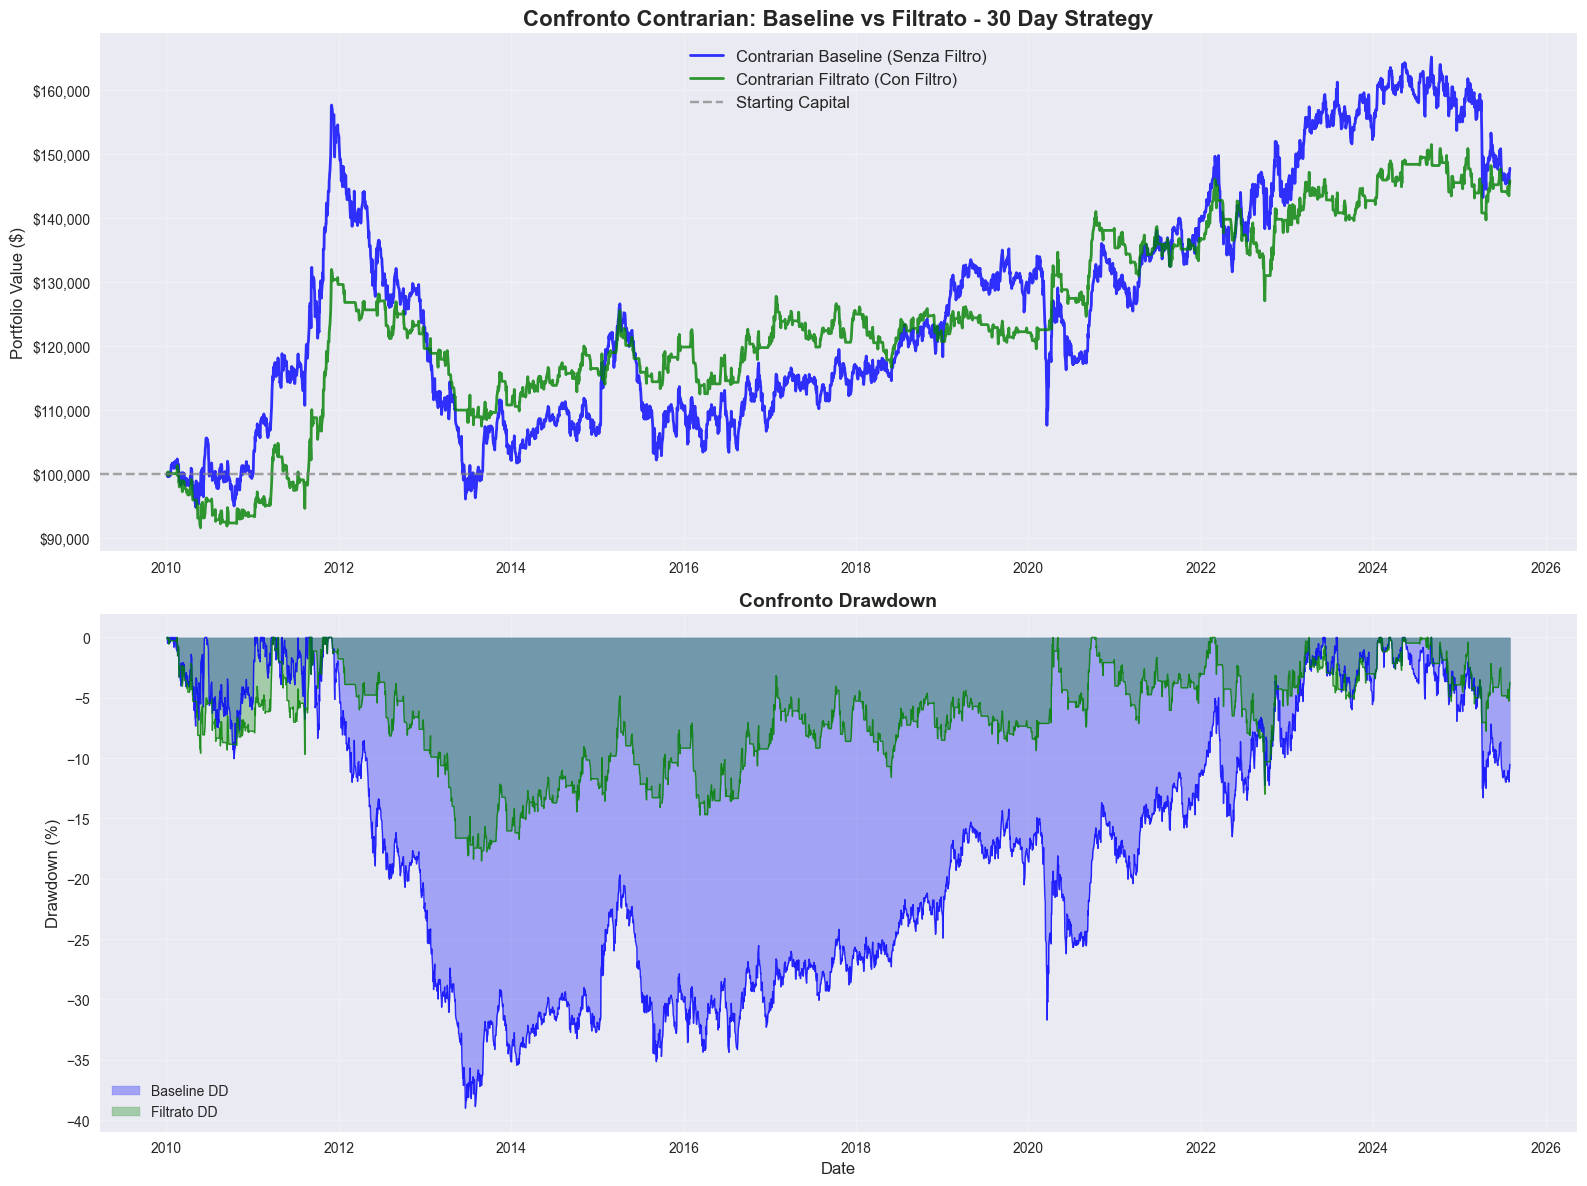

📈 Confronto equity curves e drawdown generato


In [7]:
# 1. EQUITY CURVES COMPARATIVE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Equity curves
ax1.plot(engine_baseline.portfolio_value.index, engine_baseline.portfolio_value.values, 
         linewidth=2, color='blue', label=f'Contrarian Baseline (Senza Filtro)', alpha=0.8)
ax1.plot(engine_filtered.portfolio_value.index, engine_filtered.portfolio_value.values, 
         linewidth=2, color='green', label=f'Contrarian Filtrato (Con Filtro)', alpha=0.8)
ax1.axhline(y=100000, color='gray', linestyle='--', alpha=0.7, label='Starting Capital')
ax1.set_title(f'Confronto Contrarian: Baseline vs Filtrato - {lookback_days} Day Strategy', 
              fontsize=16, fontweight='bold')
ax1.set_ylabel('Portfolio Value ($)', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Drawdown comparison
cum_ret_baseline = (1 + engine_baseline.portfolio_returns).cumprod()
drawdown_baseline = (cum_ret_baseline / cum_ret_baseline.expanding().max() - 1) * 100

cum_ret_filtered = (1 + engine_filtered.portfolio_returns).cumprod()
drawdown_filtered = (cum_ret_filtered / cum_ret_filtered.expanding().max() - 1) * 100

ax2.fill_between(drawdown_baseline.index, drawdown_baseline.values, 0, 
                 alpha=0.3, color='blue', label='Baseline DD')
ax2.fill_between(drawdown_filtered.index, drawdown_filtered.values, 0, 
                 alpha=0.3, color='green', label='Filtrato DD')
ax2.plot(drawdown_baseline.index, drawdown_baseline.values, color='blue', linewidth=1, alpha=0.8)
ax2.plot(drawdown_filtered.index, drawdown_filtered.values, color='green', linewidth=1, alpha=0.8)
ax2.set_title('Confronto Drawdown', fontsize=14, fontweight='bold')
ax2.set_ylabel('Drawdown (%)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📈 Confronto equity curves e drawdown generato")

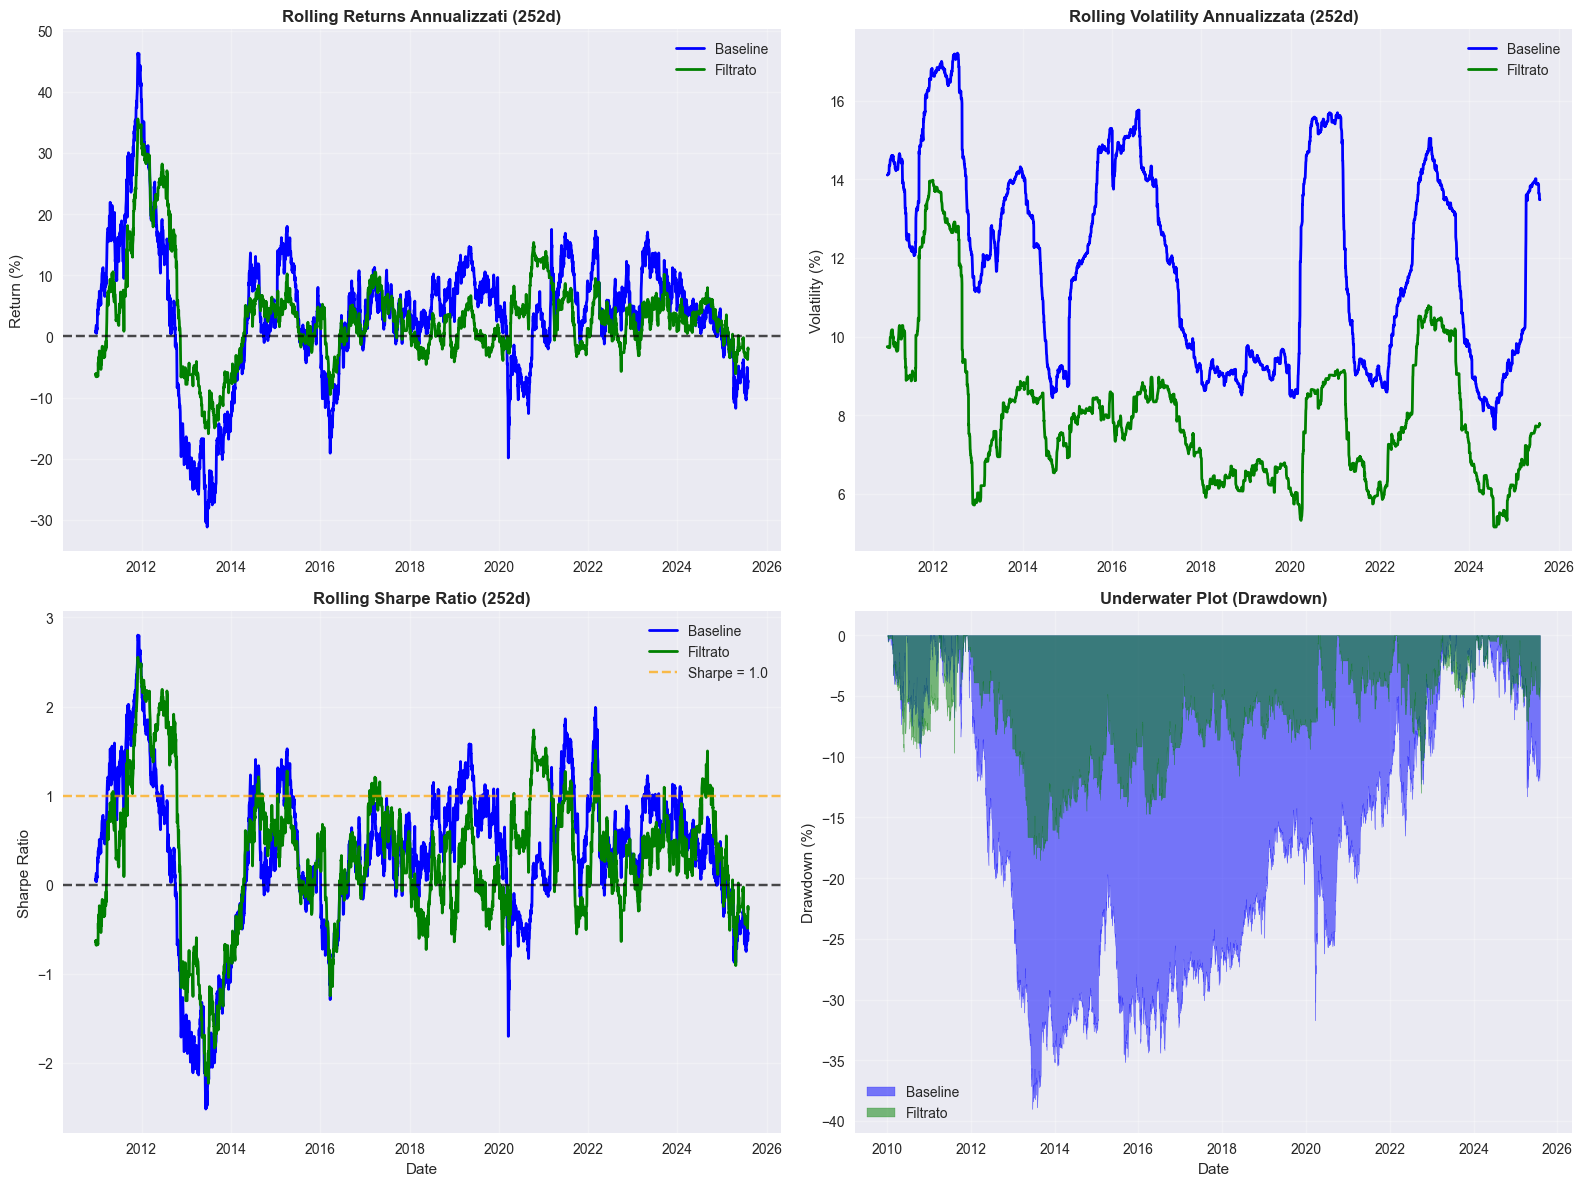

📊 Analisi rolling performance completata


In [8]:
# 2. ANALISI ROLLING PERFORMANCE
window = 252  # 1 anno

baseline_rolling_ret = engine_baseline.portfolio_returns.rolling(window).mean() * 252 * 100
filtered_rolling_ret = engine_filtered.portfolio_returns.rolling(window).mean() * 252 * 100

baseline_rolling_vol = engine_baseline.portfolio_returns.rolling(window).std() * np.sqrt(252) * 100
filtered_rolling_vol = engine_filtered.portfolio_returns.rolling(window).std() * np.sqrt(252) * 100

baseline_rolling_sharpe = baseline_rolling_ret / baseline_rolling_vol
filtered_rolling_sharpe = filtered_rolling_ret / filtered_rolling_vol

# Visualizzazione
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Rolling Returns
ax1.plot(baseline_rolling_ret.index, baseline_rolling_ret.values, 
         color='blue', label='Baseline', linewidth=2)
ax1.plot(filtered_rolling_ret.index, filtered_rolling_ret.values, 
         color='green', label='Filtrato', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax1.set_title('Rolling Returns Annualizzati (252d)', fontweight='bold')
ax1.set_ylabel('Return (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Rolling Volatility
ax2.plot(baseline_rolling_vol.index, baseline_rolling_vol.values, 
         color='blue', label='Baseline', linewidth=2)
ax2.plot(filtered_rolling_vol.index, filtered_rolling_vol.values, 
         color='green', label='Filtrato', linewidth=2)
ax2.set_title('Rolling Volatility Annualizzata (252d)', fontweight='bold')
ax2.set_ylabel('Volatility (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Rolling Sharpe
ax3.plot(baseline_rolling_sharpe.index, baseline_rolling_sharpe.values, 
         color='blue', label='Baseline', linewidth=2)
ax3.plot(filtered_rolling_sharpe.index, filtered_rolling_sharpe.values, 
         color='green', label='Filtrato', linewidth=2)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax3.axhline(y=1, color='orange', linestyle='--', alpha=0.7, label='Sharpe = 1.0')
ax3.set_title('Rolling Sharpe Ratio (252d)', fontweight='bold')
ax3.set_ylabel('Sharpe Ratio')
ax3.set_xlabel('Date')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Confronto drawdown periods
ax4.fill_between(drawdown_baseline.index, drawdown_baseline.values, 0, 
                 alpha=0.5, color='blue', label='Baseline')
ax4.fill_between(drawdown_filtered.index, drawdown_filtered.values, 0, 
                 alpha=0.5, color='green', label='Filtrato')
ax4.set_title('Underwater Plot (Drawdown)', fontweight='bold')
ax4.set_ylabel('Drawdown (%)')
ax4.set_xlabel('Date')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Analisi rolling performance completata")

## 🔍 Analisi Dettagliata del Filtro

🔍 ANALISI DETTAGLIATA ATTIVAZIONI FILTRO
📊 Statistiche Attivazione:
   • Giorni totali: 4,066
   • Giorni attivi baseline: 4,066 (100.0%)
   • Giorni attivi filtrato: 2,126 (52.3%)
   • Giorni disattivati dal filtro: 1,940 (47.7%)


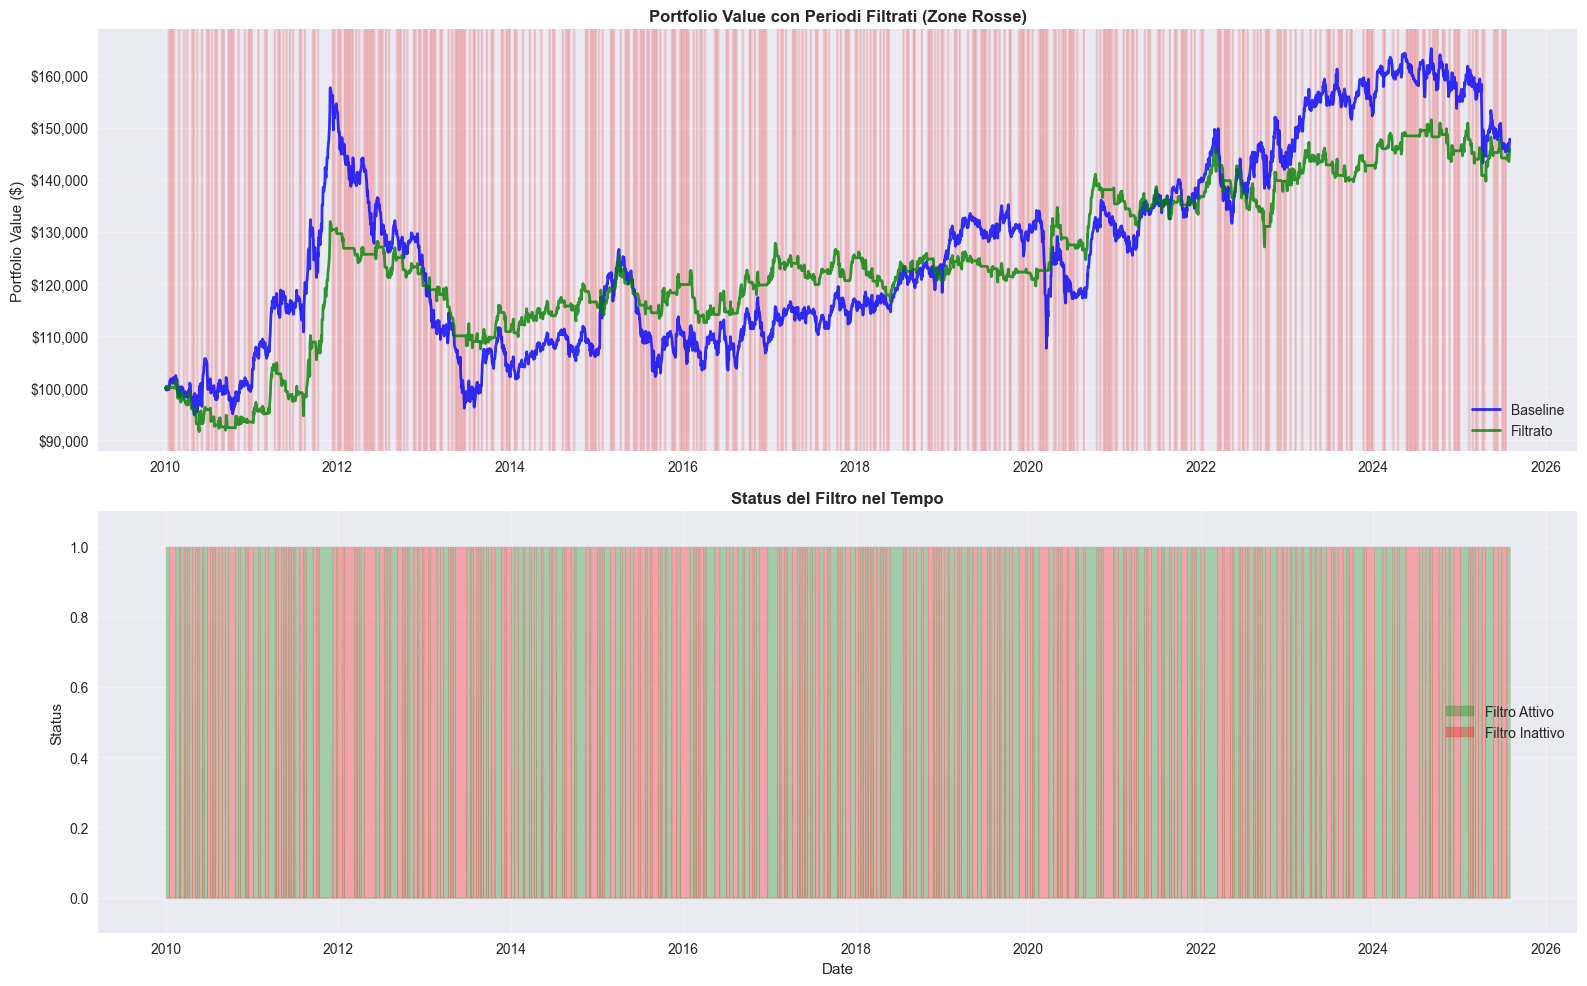

🔍 Analisi del filtro completata


In [9]:
# Calcola quando il filtro si è attivato
print("🔍 ANALISI DETTAGLIATA ATTIVAZIONI FILTRO")
print("="*50)

# Trova periodi dove il filtro ha azzerato le posizioni
baseline_active = (contrarian_baseline != 0).any(axis=1)
filtered_active = (contrarian_filtered != 0).any(axis=1)
filter_inactive = baseline_active & ~filtered_active

# Statistiche sui periodi filtrati
total_days = len(data)
baseline_active_days = baseline_active.sum()
filtered_active_days = filtered_active.sum()
filter_inactive_days = filter_inactive.sum()

print(f"📊 Statistiche Attivazione:")
print(f"   • Giorni totali: {total_days:,}")
print(f"   • Giorni attivi baseline: {baseline_active_days:,} ({baseline_active_days/total_days*100:.1f}%)")
print(f"   • Giorni attivi filtrato: {filtered_active_days:,} ({filtered_active_days/total_days*100:.1f}%)")
print(f"   • Giorni disattivati dal filtro: {filter_inactive_days:,} ({filter_inactive_days/total_days*100:.1f}%)")

# Visualizza periodi di attivazione/disattivazione
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Equity curve con zone filtrate evidenziate
ax1.plot(engine_baseline.portfolio_value.index, engine_baseline.portfolio_value.values, 
         linewidth=2, color='blue', label='Baseline', alpha=0.8)
ax1.plot(engine_filtered.portfolio_value.index, engine_filtered.portfolio_value.values, 
         linewidth=2, color='green', label='Filtrato', alpha=0.8)

# Evidenzia periodi in cui il filtro è inattivo
for i, (date, is_inactive) in enumerate(filter_inactive.items()):
    if is_inactive:
        ax1.axvspan(date, date, alpha=0.2, color='red')

ax1.set_title('Portfolio Value con Periodi Filtrati (Zone Rosse)', fontweight='bold')
ax1.set_ylabel('Portfolio Value ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Status del filtro nel tempo
filter_status = filtered_active.astype(int)
ax2.fill_between(filter_status.index, filter_status.values, alpha=0.3, color='green', 
                 label='Filtro Attivo')
ax2.fill_between(filter_status.index, 1-filter_status.values, alpha=0.3, color='red', 
                 label='Filtro Inattivo')
ax2.set_title('Status del Filtro nel Tempo', fontweight='bold')
ax2.set_ylabel('Status')
ax2.set_xlabel('Date')
ax2.set_ylim(-0.1, 1.1)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🔍 Analisi del filtro completata")

## 📅 Analisi Stagionale e Mensile

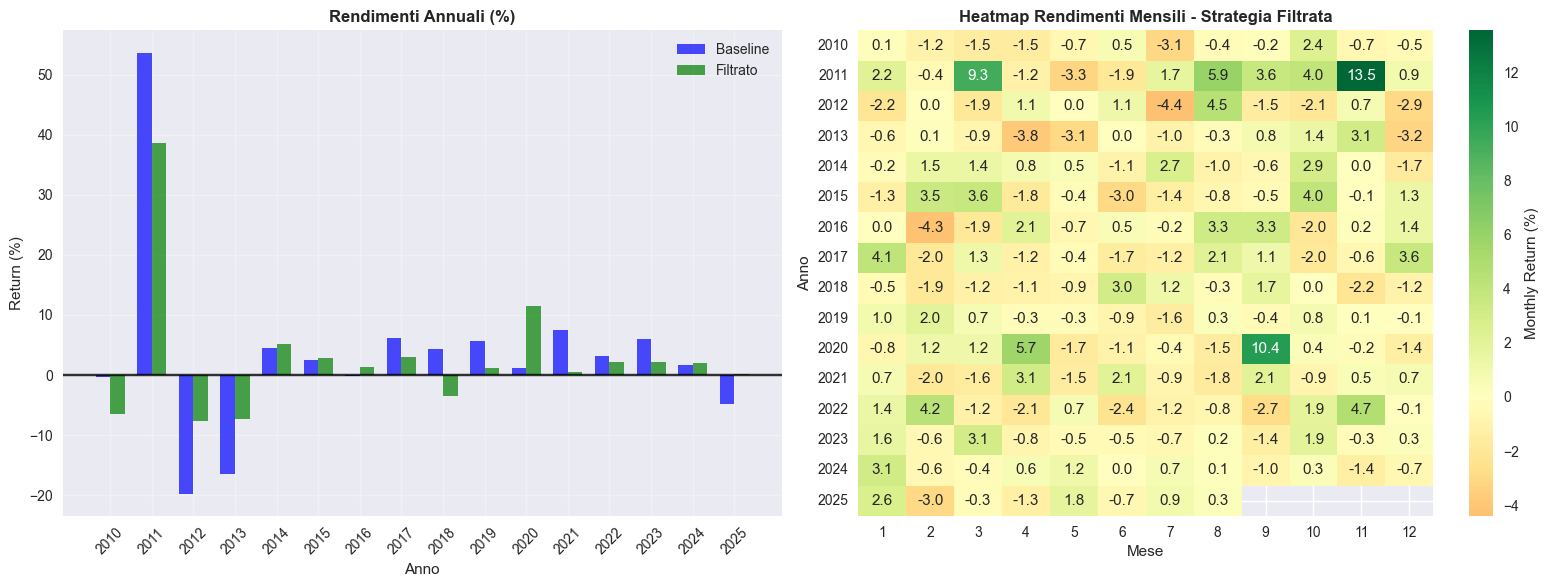


📅 RENDIMENTI ANNUALI:
Anno   Baseline     Filtrato     Differenza  
---------------------------------------------
2010   -0.3         -6.5         -6.2        
2011   53.7         38.6         -15.1       
2012   -19.8        -7.7         +12.1       
2013   -16.5        -7.4         +9.1        
2014   4.5          5.1          +0.6        
2015   2.6          2.9          +0.3        
2016   -0.2         1.3          +1.5        
2017   6.1          2.9          -3.2        
2018   4.3          -3.4         -7.8        
2019   5.7          1.1          -4.5        
2020   1.1          11.5         +10.4       
2021   7.6          0.4          -7.1        
2022   3.2          2.2          -1.0        
2023   6.0          2.2          -3.8        
2024   1.7          2.0          +0.3        
2025   -4.9         0.2          +5.1        

📊 Analisi stagionale completata


In [10]:
# Analisi rendimenti per mese e anno
baseline_returns = engine_baseline.portfolio_returns
filtered_returns = engine_filtered.portfolio_returns

# Crea DataFrame per analisi
returns_df = pd.DataFrame({
    'Date': baseline_returns.index,
    'Baseline': baseline_returns.values,
    'Filtered': filtered_returns.values
})
returns_df['Year'] = returns_df['Date'].dt.year
returns_df['Month'] = returns_df['Date'].dt.month

# Rendimenti annuali
annual_returns = returns_df.groupby('Year')[['Baseline', 'Filtered']].apply(
    lambda x: (1 + x).prod() - 1
) * 100

# Visualizza rendimenti annuali
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart rendimenti annuali
years = annual_returns.index
x = np.arange(len(years))
width = 0.35

ax1.bar(x - width/2, annual_returns['Baseline'], width, label='Baseline', color='blue', alpha=0.7)
ax1.bar(x + width/2, annual_returns['Filtered'], width, label='Filtrato', color='green', alpha=0.7)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.8)
ax1.set_title('Rendimenti Annuali (%)', fontweight='bold')
ax1.set_ylabel('Return (%)')
ax1.set_xlabel('Anno')
ax1.set_xticks(x)
ax1.set_xticklabels(years, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Heatmap rendimenti mensili per il filtrato
monthly_returns = returns_df.groupby(['Year', 'Month'])['Filtered'].apply(
    lambda x: (1 + x).prod() - 1
) * 100
monthly_pivot = monthly_returns.unstack(level=1)

sns.heatmap(monthly_pivot, annot=True, cmap='RdYlGn', center=0, fmt='.1f',
            cbar_kws={'label': 'Monthly Return (%)'}, ax=ax2)
ax2.set_title('Heatmap Rendimenti Mensili - Strategia Filtrata', fontweight='bold')
ax2.set_xlabel('Mese')
ax2.set_ylabel('Anno')

plt.tight_layout()
plt.show()

# Statistiche annuali
print(f"\n📅 RENDIMENTI ANNUALI:")
print(f"{'Anno':<6} {'Baseline':<12} {'Filtrato':<12} {'Differenza':<12}")
print("-"*45)
for year in annual_returns.index:
    baseline_ret = annual_returns.loc[year, 'Baseline']
    filtered_ret = annual_returns.loc[year, 'Filtered']
    diff = filtered_ret - baseline_ret
    print(f"{year:<6} {baseline_ret:<12.1f} {filtered_ret:<12.1f} {diff:<+12.1f}")

print(f"\n📊 Analisi stagionale completata")